In [473]:
# Loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Loading the Data
Data = pd.read_csv("Regression.csv",header=None)
Data.columns = ["Col1","Col2","Col3"]  

## Data Analysis


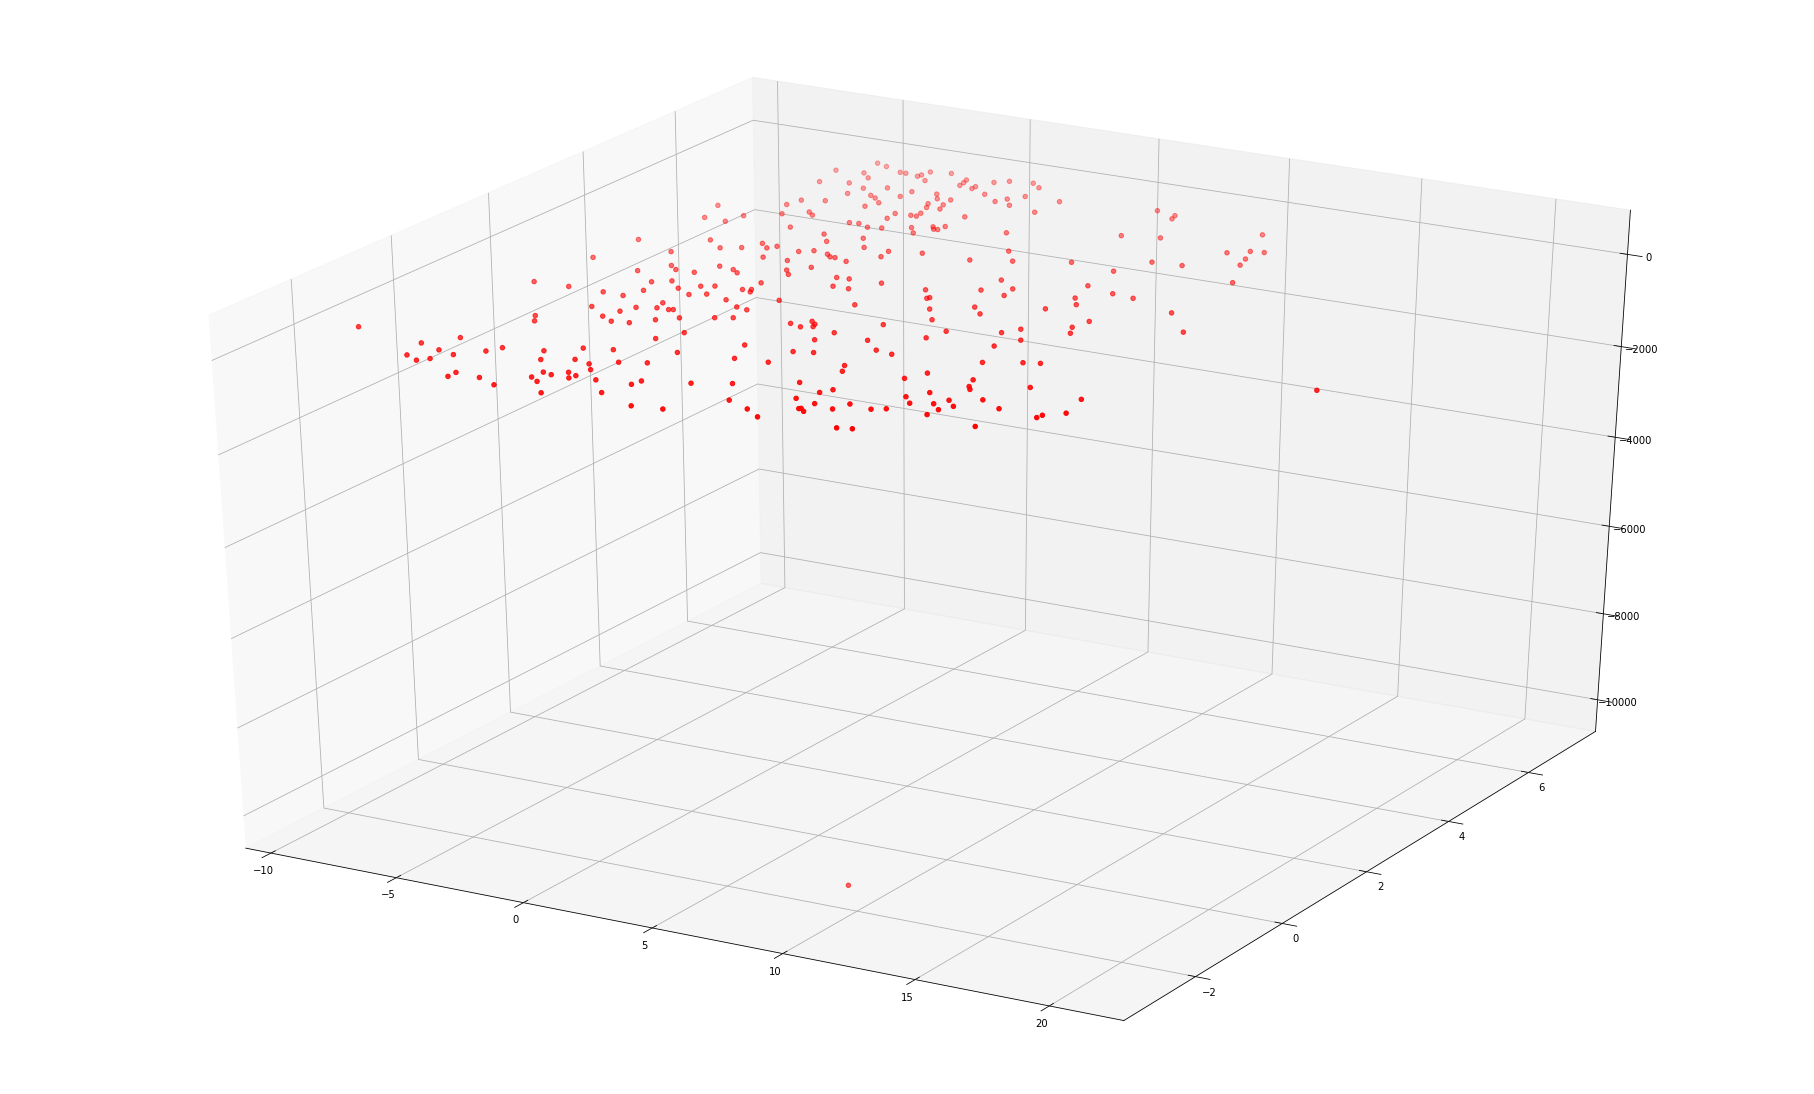

In [474]:
# 3D scatter plot
plt.rcParams['figure.figsize'] = (25.0, 15.0)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Data['Col1'], Data['Col2'], Data['Col3'], color='red')

We remove the outlier at the bottom, and plot again without the outlier

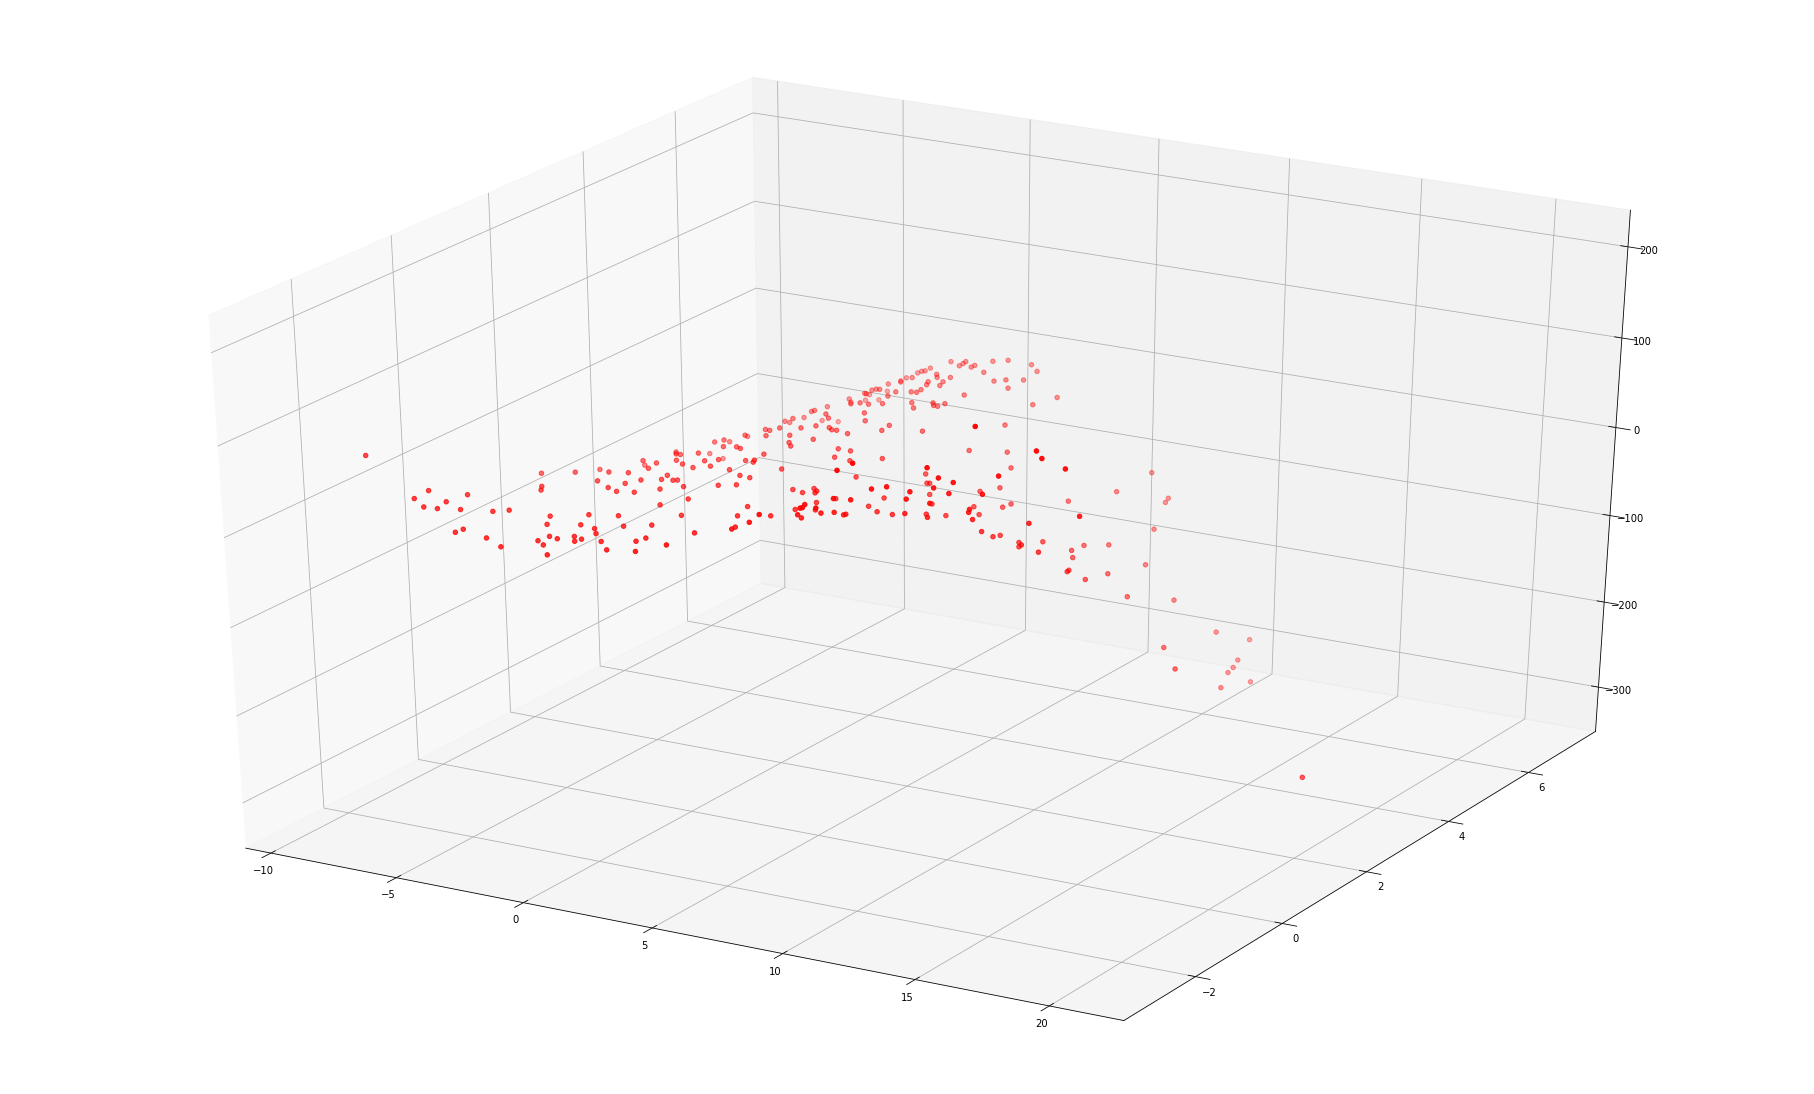

In [475]:
# Removing outlier
Data = Data[Data.Col3 != Data.Col3.min()]

# 3D scatter plot (without outlier)
plt.rcParams['figure.figsize'] = (25.0, 15.0)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Data.Col1, Data.Col2, Data.Col3, color='red')

There seems to be a pattern in the data

## Linear Regression


We want to find coefficients for the following relationship:
$$Col3 = \beta_0 + \beta_1Col1 + \beta_2Col2$$

In [476]:
# Coefficients
Beta = np.array([0,0,0])
w0 = np.ones(len(Data.Col2.values))
X = np.array([w0,Data.Col1.values,Data.Col2.values]).T
Y = np.array(Data.Col3.values)

# Cost 
def f_cost(X,Y,Beta):
    return np.sum((X.dot(Beta)-Y) ** 2)/(2 * len(Y))

print("Initial Cost: "+ str(f_cost(X,Y,Beta)))

Initial Cost: 2569.004848006957


In [477]:
# Gradient Descent (For improvement)
def gradient_descent(X, Y, Beta, Alpha, iterations):
    
    # storing cost
    cost = [0] * iterations
    m = len(Y)
    
    # Loop
    for i in range(iterations):
        
        # Gradient 
        gradient = X.T.dot(X.dot(Beta)-Y) / len(Y)
        
        # Updating Beta
        Beta = Beta - Alpha * gradient
        
        # Cost
        c = f_cost(X, Y, Beta)
        cost[i] = c
        
    return Beta, cost

# 100,000 iterations
alpha = 0.0001 # alpha (hyperparameter) is 0.0001
n = 100000 # 100k iterations
Beta_Final, cost_history = gradient_descent(X,Y,Beta,alpha,n)
print(Beta_Final)
print("Cost: " + str(cost_history[-1]))

[ 25.6266634  -1.360833  -15.2055082]
Cost: 1536.0952701402643


In [478]:
# R-squared Score
def r_squared(Y, Y_pred):
    ss_t = sum((Y - np.mean(Y)) ** 2)
    ss_r = sum((Y - Y_pred) ** 2)
    r_squared = 1 - (ss_r / ss_t)
    return r_squared

print("The R squared value is: " + str(r_squared(Y,X.dot(Beta_Final))))

The R squared value is: 0.39402095982912533


## Next Steps

We have an R-squared value of **0.3940**, and we try the following to improve it:
- Adding Interaction Effects
- Adding polynomials

_N.B. To keep the interpretability of the coefficients, we do not normalize the data_

In [481]:
# Interaction Effect (Stand Alone)
Data = pd.read_csv("Regression.csv",header=None)
Data.columns = ["Col1","Col2","Col3"]  
Data = Data[Data.Col3 != Data.Col3.min()]
Beta = np.array([0,0,0,0])
X = np.array([w0,Data.Col1.values,Data.Col2.values,Data.Col1.values*Data.Col2.values]).T
Y = np.array(Data.Col3.values)

## 100,000 iterations
alpha = 0.0001 # alpha (hyperparameter) is 0.0001
n = 100000 # 100k iterations
Beta_Final, cost_history = gradient_descent(X,Y,Beta,alpha,n)
print(Beta_Final)
print("Cost: " + str(cost_history[-1]))
print("The R squared value is: " + str(r_squared(Y,X.dot(Beta_Final))))

[ 12.26631231   2.15657186 -10.71313854  -2.57354588]
Cost: 687.527643661729
The R squared value is: 0.7287750638285382


By adding an interaction between the first two columns, we have an R-squared value of **0.7288**, almost twice as much as before. We will add polynomial terms to the model with iteraction effect

In [494]:
# Polynomial Effect
Data = pd.read_csv("Regression.csv",header=None)
Data.columns = ["Col1","Col2","Col3"]  
Data = Data[Data.Col3 != Data.Col3.min()]
Beta = np.array([0,0,0,0,0,0])
X_1 = (Data.Col1.values)**2
X_2 = (Data.Col2.values)**2
X = np.array([w0,Data.Col1.values,Data.Col2.values,Data.Col1.values*Data.Col2.values,X_1,X_2]).T
Y = np.array(Data.Col3.values)

## 100,000 iterations
alpha = 0.0001 # alpha (hyperparameter) is 0.0001
n = 100000 # 100k iterations
Beta_Final, cost_history = gradient_descent(X,Y,Beta,alpha,n)
print(Beta_Final)
print("Cost: " + str(cost_history[-1]))
print("The R squared value is: " + str(r_squared(Y,X.dot(Beta_Final))))

[ 20.22996728   6.00712421 -12.26384721  -2.69510264  -0.47108715
   0.31155602]
Cost: 562.3467357838462
The R squared value is: 0.7781580727330781


By adding an interaction and a polynomial (quadratic terms for the first two columns) , we have a final R-squared value of **0.7782**

## Conclusion

We have the following model that explains over 77.8% of the variance:

Let the first column be $X_1$, the second column be $X_2$ and the third column be $Y$

$$ Y = \beta_0 +\beta_1 X_1 + \beta_2 X_1 + \beta_3 (X_1*X_2) + \beta_4 X_1^2 + \beta_5 X_2^2$$

With the coefficients to three significant figures, the model is as follows:

$$ Y = 20.2 + 6.01 (X_1) -12.26 (X_1)  -2.70(X_1*X_2) -0.471 (X_1^2) + 0.312(X_2^2)$$

